In [1]:
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway, spearmanr

In [2]:
# Ścieżki do danych
img_folder = ("D:\studia\magistera\PAD-UFES-20\obrazy_pad")
metadata_path = ("D:\studia\magistera\PAD-UFES-20\metadane_pad\metadata.csv")

# Wczytanie metadanych
metadata = pd.read_csv(metadata_path)


  patient_id  lesion_id  smoke  drink background_father background_mother  \
0   PAT_1516       1765    NaN    NaN               NaN               NaN   
1     PAT_46        881  False  False         POMERANIA         POMERANIA   
2   PAT_1545       1867    NaN    NaN               NaN               NaN   
3   PAT_1989       4061    NaN    NaN               NaN               NaN   
4    PAT_684       1302  False   True         POMERANIA         POMERANIA   

   age pesticide  gender skin_cancer_history  ... diameter_2 diagnostic  \
0    8       NaN     NaN                 NaN  ...        NaN        NEV   
1   55     False  FEMALE                True  ...        5.0        BCC   
2   77       NaN     NaN                 NaN  ...        NaN        ACK   
3   75       NaN     NaN                 NaN  ...        NaN        ACK   
4   79     False    MALE                True  ...        5.0        BCC   

    itch   grew   hurt  changed  bleed elevation                 img_id  \
0  False  F

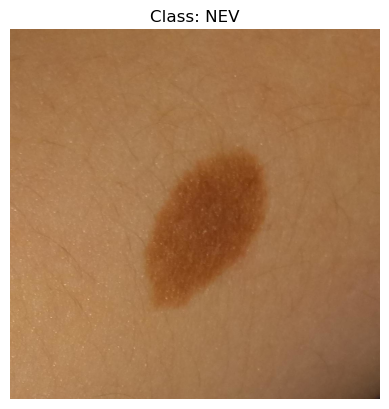

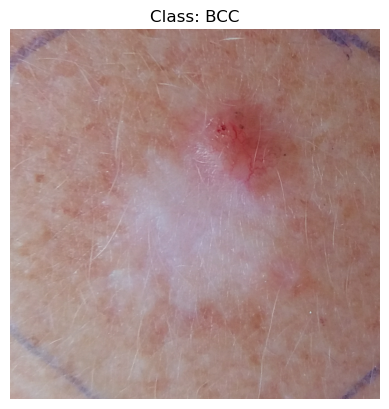

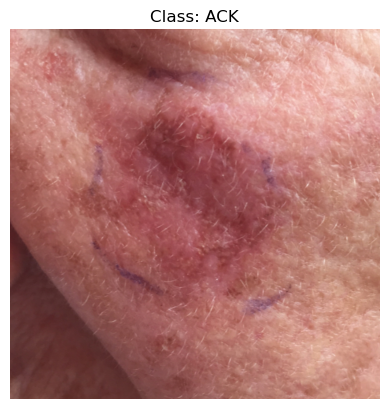

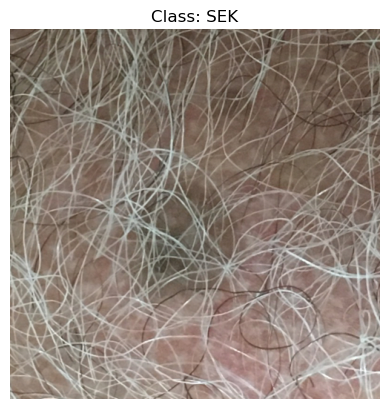

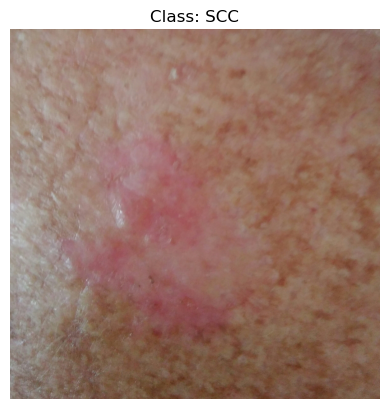

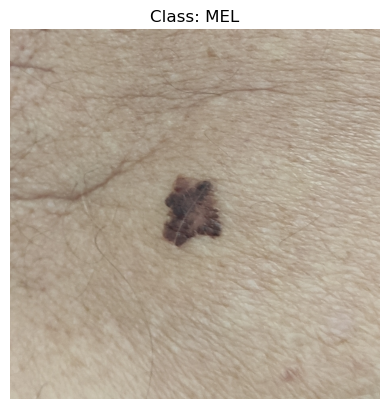

In [3]:
# Wyświetlenie pierwszych wierszy danych
print(metadata.head())

# Wyświetlenie kilku obrazów z różnych klas diagnostycznych
diagnostic_classes = metadata['diagnostic'].unique()
print("Unikalne klasy diagnostyczne:", diagnostic_classes)

for diag in diagnostic_classes:
    img_id = metadata[metadata['diagnostic'] == diag]['img_id'].values[0]
    img_path = os.path.join(img_folder, img_id)

    if os.path.exists(img_path):
        img = Image.open(img_path)
        plt.imshow(img)
        plt.title(f"Class: {diag}")
        plt.axis('off')
        plt.show()
    else:
        print(f"Obraz {img_id} nie istnieje!")

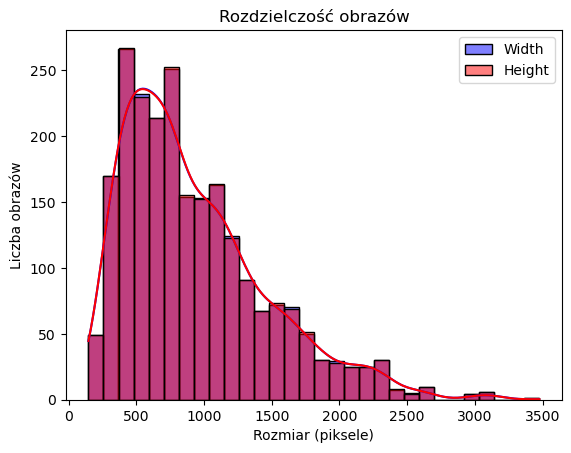

In [4]:
 # Analiza rozdzielczości obrazów
resolutions = []
for img_id in metadata['img_id']:
    img_path = os.path.join(img_folder, img_id)
    if os.path.exists(img_path):
        with Image.open(img_path) as img:
            resolutions.append(img.size)  # (width, height)

# Tworzenie wykresów rozdzielczości
widths, heights = zip(*resolutions)
sns.histplot(widths, kde=True, bins=30, color="blue", label="Width")
sns.histplot(heights, kde=True, bins=30, color="red", label="Height")
plt.legend()
plt.title("Rozdzielczość obrazów")
plt.xlabel("Rozmiar (piksele)")
plt.ylabel("Liczba obrazów")
plt.show()



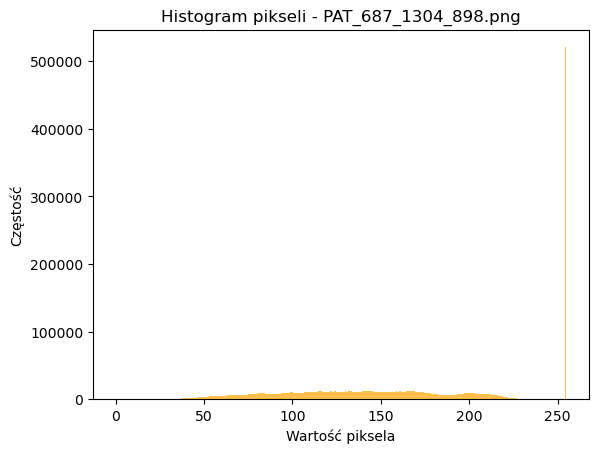

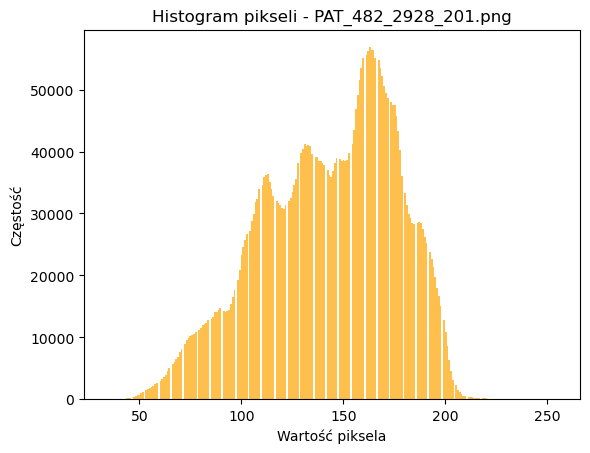

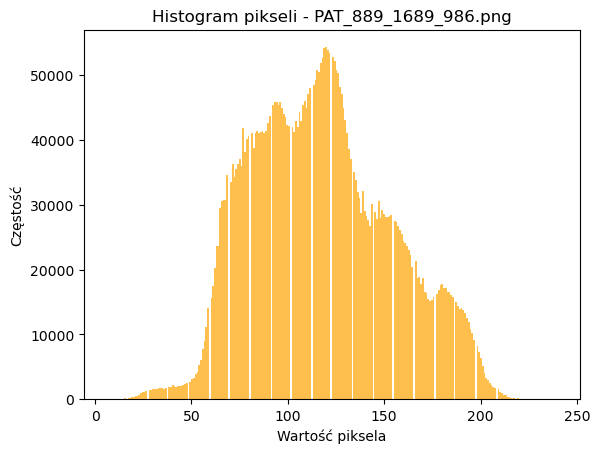

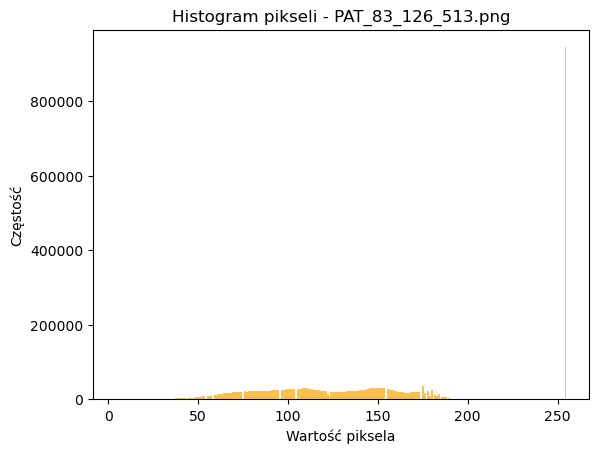

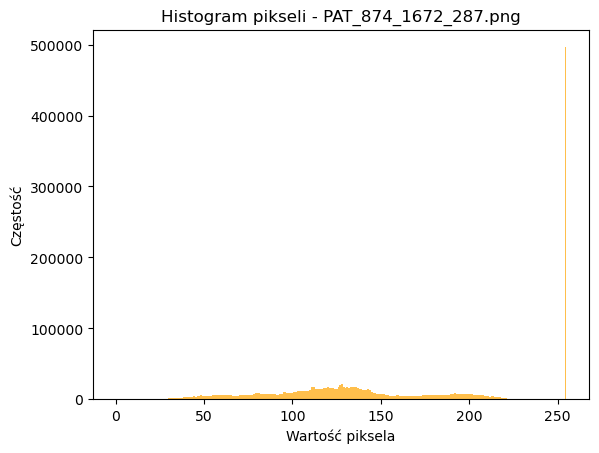

In [5]:
 
# Histogram pikseli dla przykładowych obrazów
sample_images = metadata['img_id'].sample(5).values
for img_id in sample_images:
    img_path = os.path.join(img_folder, img_id)
    if os.path.exists(img_path):
        with Image.open(img_path) as img:
            img = np.array(img)
            plt.hist(img.ravel(), bins=256, color='orange', alpha=0.7)
            plt.title(f"Histogram pikseli - {img_id}")
            plt.xlabel("Wartość piksela")
            plt.ylabel("Częstość")
            plt.show()

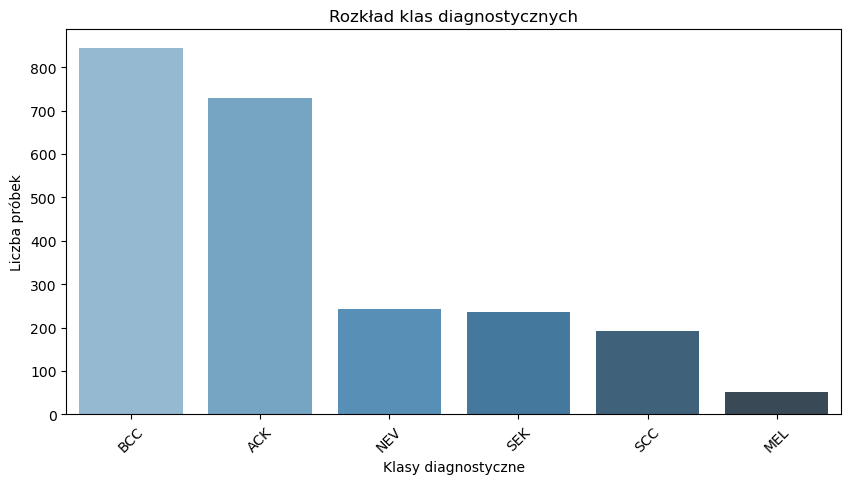

In [6]:
 
# Rozkład klas diagnostycznych
plt.figure(figsize=(10, 5))
sns.countplot(data=metadata, x="diagnostic", palette="Blues_d", order=metadata['diagnostic'].value_counts().index)
plt.title("Rozkład klas diagnostycznych")
plt.xlabel("Klasy diagnostyczne")
plt.ylabel("Liczba próbek")
plt.xticks(rotation=45)
plt.show()

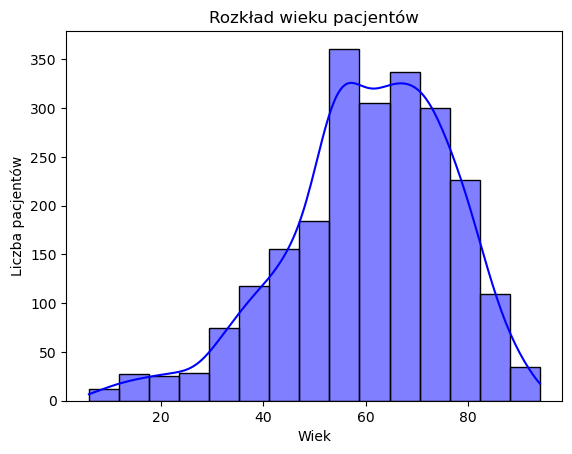

In [7]:
 
# Rozkład wieku pacjentów
sns.histplot(metadata['age'], kde=True, bins=15, color="blue")
plt.title("Rozkład wieku pacjentów")
plt.xlabel("Wiek")
plt.ylabel("Liczba pacjentów")
plt.show()

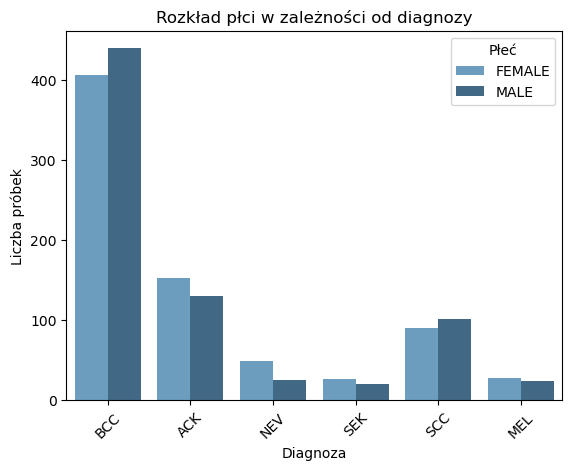

In [8]:

# Rozkład płci w zależności od diagnozy
sns.countplot(x='diagnostic', hue='gender', data=metadata, palette="Blues_d", order=metadata['diagnostic'].value_counts().index)
plt.title("Rozkład płci w zależności od diagnozy")
plt.xlabel("Diagnoza")
plt.ylabel("Liczba próbek")
plt.xticks(rotation=45)
plt.legend(title="Płeć")
plt.show()

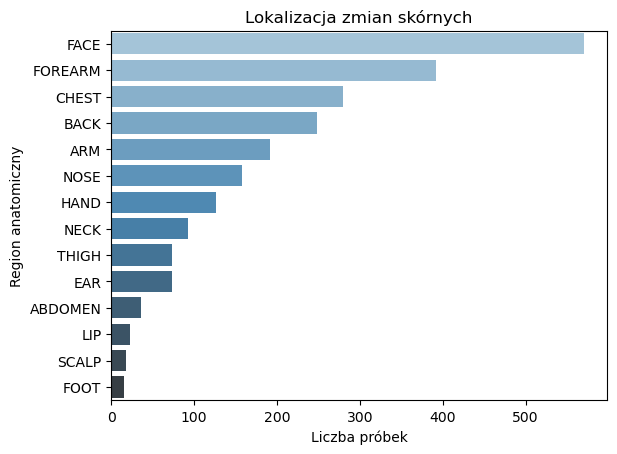

In [9]:
 
# Analiza lokalizacji zmian skórnych
sns.countplot(y="region", data=metadata, order=metadata['region'].value_counts().index, palette="Blues_d")
plt.title("Lokalizacja zmian skórnych")
plt.xlabel("Liczba próbek")
plt.ylabel("Region anatomiczny")
plt.show()

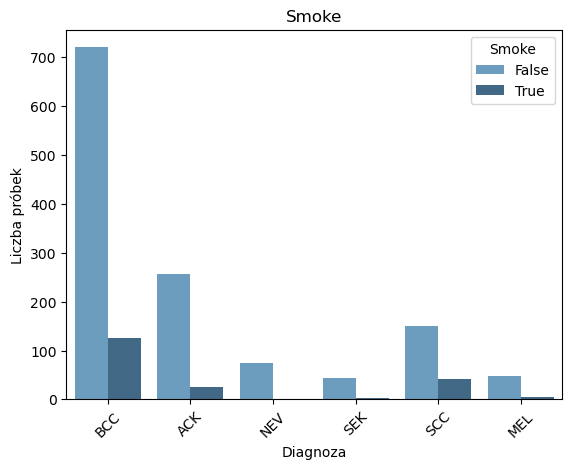

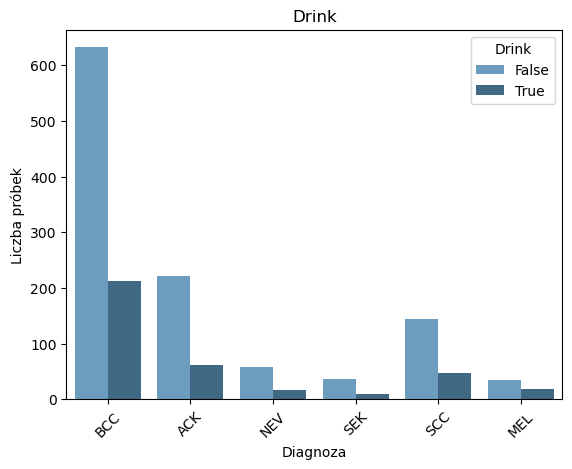

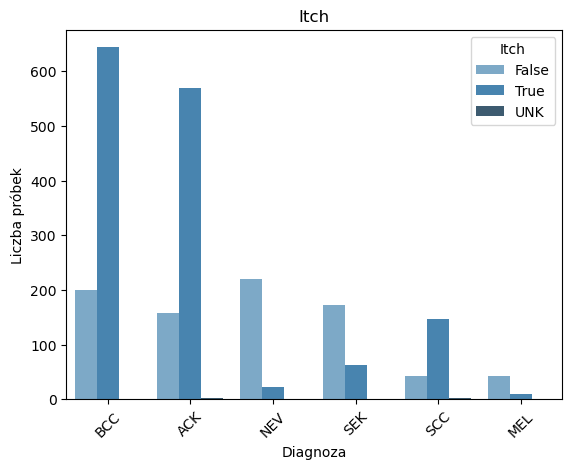

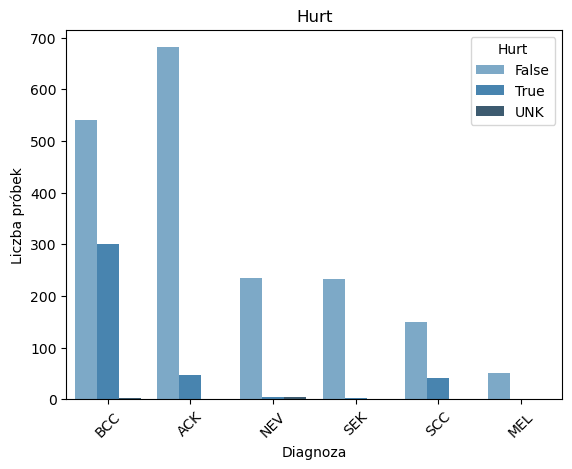

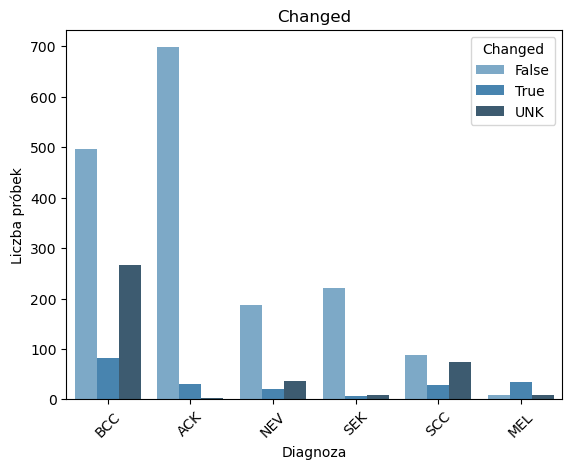

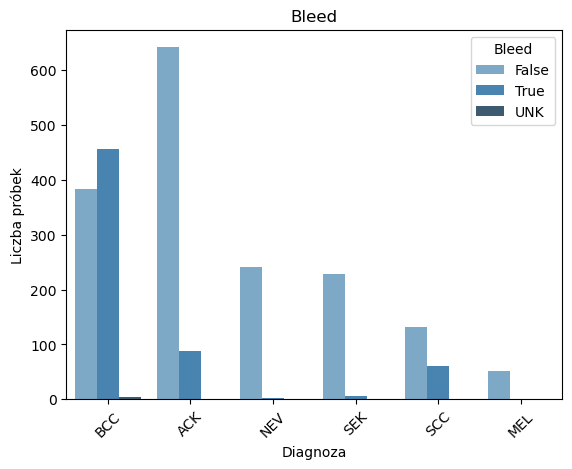

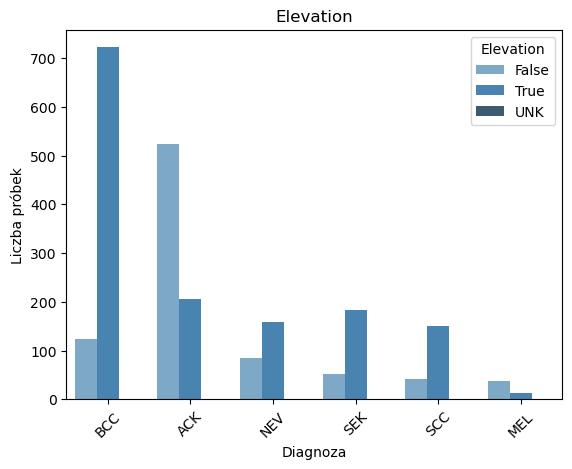

In [11]:
 
# Analiza cech booleanowych
feats = ['smoke', 'drink', 'itch', 'hurt', 'changed', 'bleed', 'elevation']
for feat in feats:
    sns.countplot(x='diagnostic', hue=feat, data=metadata, palette="Blues_d", order=metadata['diagnostic'].value_counts().index)
    plt.title(f"{feat.capitalize()}")
    plt.xlabel("Diagnoza")
    plt.ylabel("Liczba próbek")
    plt.xticks(rotation=45)
    plt.legend(title=feat.capitalize())
    plt.show()

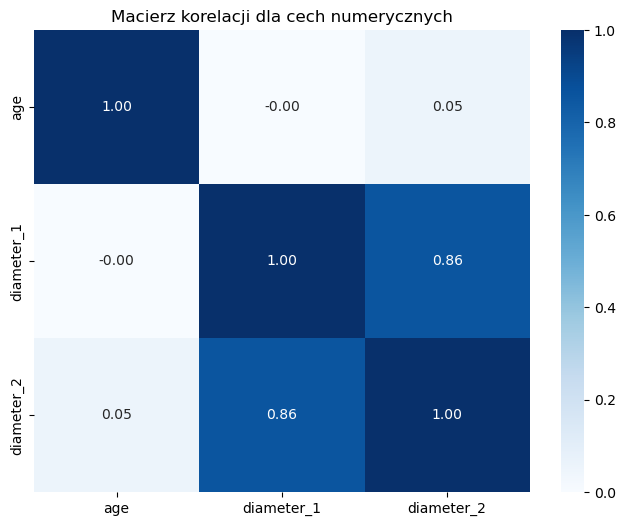

In [12]:
 
# Macierz korelacji dla cech numerycznych
numerical_features = ['age', 'diameter_1', 'diameter_2']  # Dodaj inne cechy, jeśli istnieją
correlation_matrix = metadata[numerical_features].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Blues", fmt=".2f", cbar=True)
plt.title("Macierz korelacji dla cech numerycznych")
plt.show()

In [13]:
 
# Statystyki opisowe dla cech numerycznych z podziałem na klasy diagnostyczne
print("Statystyki opisowe dla cech numerycznych z podziałem na klasy diagnostyczne:")
print(metadata.groupby('diagnostic')[numerical_features].describe())

Statystyki opisowe dla cech numerycznych z podziałem na klasy diagnostyczne:
              age                                                        \
            count       mean        std   min    25%   50%    75%   max   
diagnostic                                                                
ACK         730.0  61.749315  12.696042  20.0  52.25  62.0  71.00  92.0   
BCC         845.0  63.146746  13.459515  22.0  54.00  63.0  73.00  94.0   
MEL          52.0  59.826923  13.865914  21.0  52.25  58.0  70.00  90.0   
NEV         244.0  35.643443  15.581193   6.0  24.75  35.0  48.00  81.0   
SCC         192.0  68.864583  12.210304  32.0  61.00  69.0  78.25  94.0   
SEK         235.0  65.880851  12.155802  21.0  57.50  67.0  75.00  90.0   

           diameter_1             ...              diameter_2             \
                count       mean  ...   75%    max      count       mean   
diagnostic                        ...                                      
ACK             283

In [14]:
 
# Testy ANOVA dla wieku i średnic zmian
age_groups = [metadata[metadata['diagnostic'] == diag]['age'].dropna() for diag in metadata['diagnostic'].unique()]
anova_age = f_oneway(*age_groups)
print(f"ANOVA dla wieku: F-statistic = {anova_age.statistic:.2f}, p-value = {anova_age.pvalue:.4f}")

for col in ['diameter_1', 'diameter_2']:
    groups = [metadata[metadata['diagnostic'] == diag][col].dropna() for diag in metadata['diagnostic'].unique()]
    anova_result = f_oneway(*groups)
    print(f"ANOVA dla {col}: F-statistic = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.4f}")

ANOVA dla wieku: F-statistic = 202.93, p-value = 0.0000
ANOVA dla diameter_1: F-statistic = 3.07, p-value = 0.0092
ANOVA dla diameter_2: F-statistic = 5.19, p-value = 0.0001


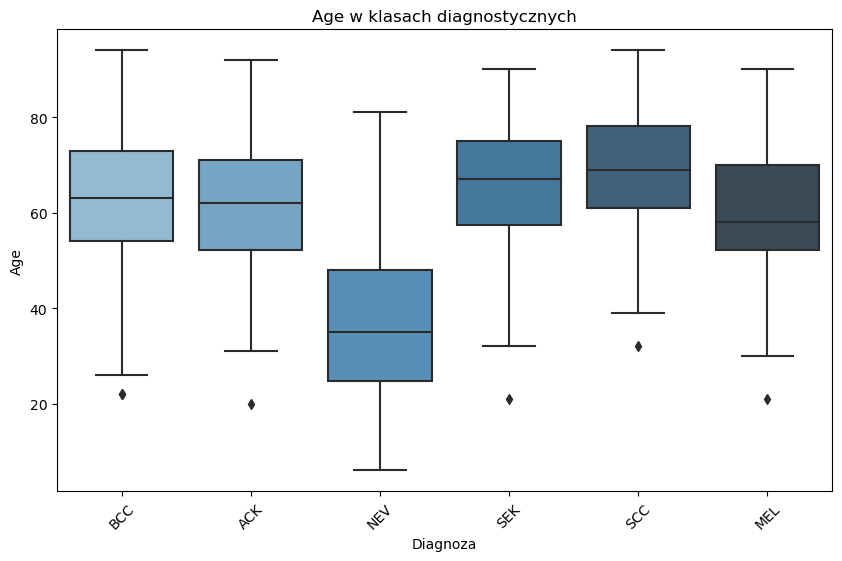

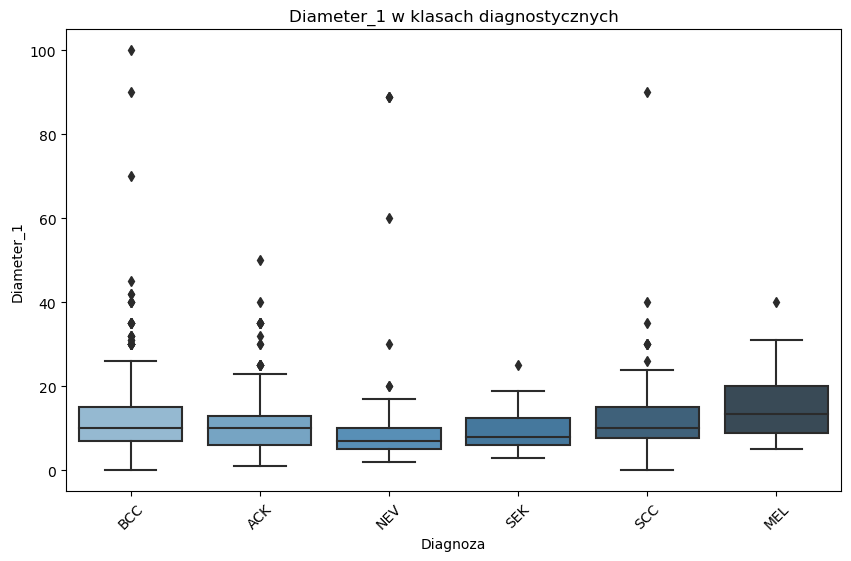

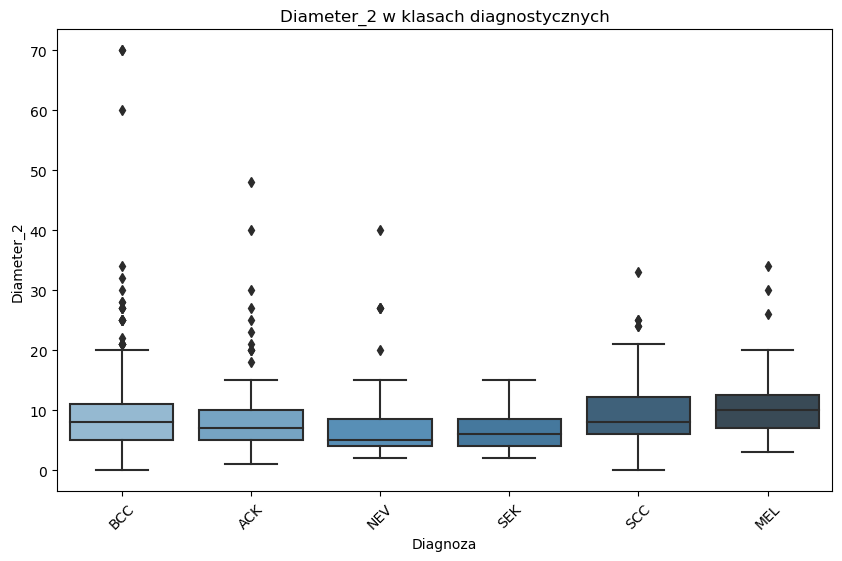

In [15]:
 
# Wizualizacje różnic w cechach numerycznych (boxplot)
for feature in ['age', 'diameter_1', 'diameter_2']:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=metadata, x='diagnostic', y=feature, palette="Blues_d", order=metadata['diagnostic'].value_counts().index)
    plt.title(f"{feature.capitalize()} w klasach diagnostycznych")
    plt.xlabel("Diagnoza")
    plt.ylabel(feature.capitalize())
    plt.xticks(rotation=45)
    plt.show()

In [16]:
 
# Sprawdzenie brakujących obrazów
img_ids = metadata['img_id'].values
missing_imgs = [img_id for img_id in img_ids if not os.path.exists(os.path.join(img_folder, img_id))]
print(f"Liczba brakujących obrazów: {len(missing_imgs)}")
if missing_imgs:
    print("Przykładowe brakujące obrazy:", missing_imgs[:5])

Liczba brakujących obrazów: 0
